### TJ Kim's Exploration of Titanic Data

For this exploration, I have explored the effects of survival the gender of individuals. Then I delved deeper and divided each gender into kids and adult groups and analyzed the survival rates. Finally, I created a scatter plot between age and fare price to see if your age had an impact on how much you had to pay.

Initially I imported and printed the data on the screen. Then I created histograms on survival for each male and female gender groups and computed their survival rate.

In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame
import thinkstats2
import thinkplot

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

# preview the data
print titanic_df.columns
titanic_df

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


/home/tj/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


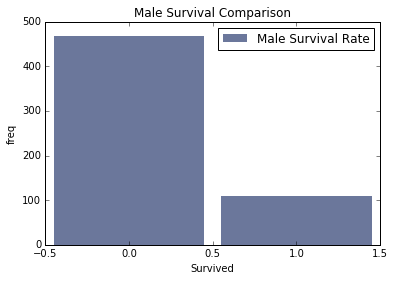

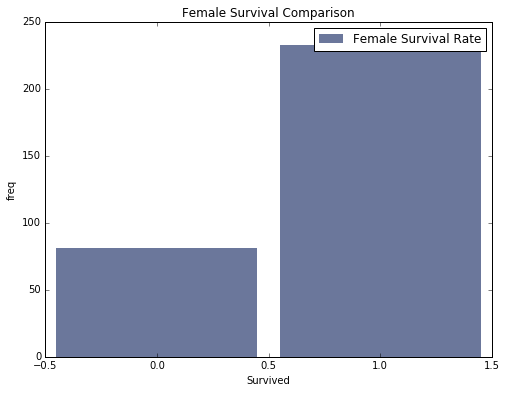

Male Survival Rate Mean: 18.8908145581 %
Female Survival Rate Mean: 74.2038216561 %


In [3]:
# Compare survival frequency for males and females

# Filter out data between male and female
male_group = titanic_df[titanic_df.Sex == "male"]
female_group = titanic_df[titanic_df.Sex == "female"]

# Generate histogram for male survival frequency
hist_male_surv = thinkstats2.Hist(male_group.Survived, label='Male Survival Rate')
thinkplot.Hist(hist_male_surv)
thinkplot.Show(title='Male Survival Comparison',xlabel='Survived',ylabel='freq')

# Generate histogram for female survival frequency
hist_female_surv = thinkstats2.Hist(female_group.Survived, label='Female Survival Rate')
thinkplot.Hist(hist_female_surv)
thinkplot.Show(title='Female Survival Comparison',xlabel='Survived',ylabel='freq')

# Grabbing survival rates for each gender using .mean()
mean_male_group = male_group.Survived.mean()
mean_female_group = female_group.Survived.mean()
print "Male Survival Rate Mean:", mean_male_group*100, "%"
print "Female Survival Rate Mean:", mean_female_group*100, "%"

The general trend of the gender divided data seems to agree with general prediction. When a disaster occured, women and children were rescued first, and thus the majority of women survived the crash, while majority of men did not make it.

After this, I analyzed the survival rate of each age group within each gender group. Age groups had the cutoff line at 15 years old. People who were 15 under were kids, while people above 15 were adults.

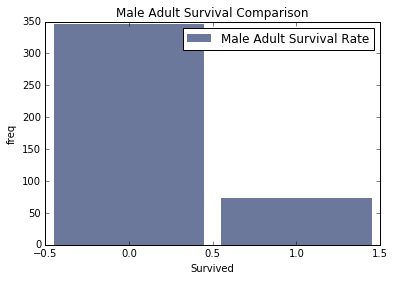

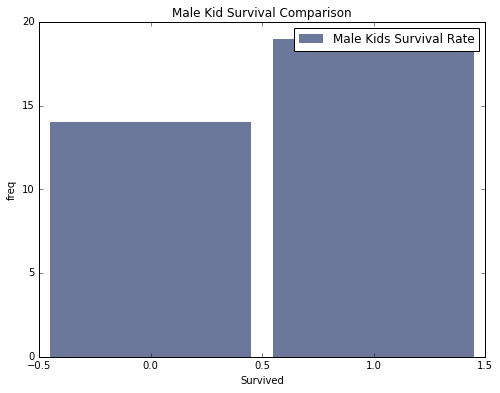

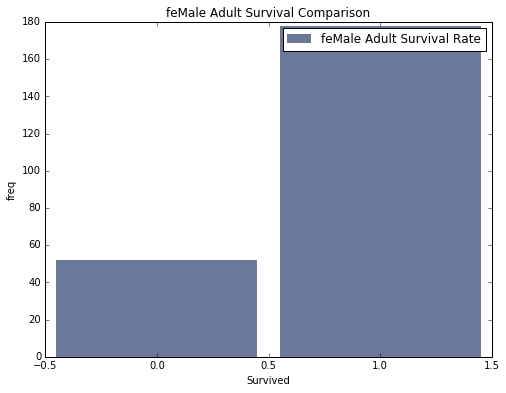

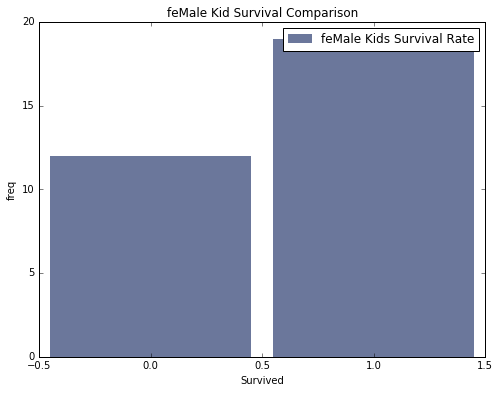

Male Adult Survival Rate Mean: 17.619047619 %
Male Kid Survival Rate Mean: 57.5757575758 %
Female Adult Survival Rate Mean: 77.3913043478 %
Female Kid Survival Rate Mean: 61.2903225806 %


In [7]:
# Observing Conjunction of Features: Age and Gender

# Divide data up by Gender, then age within each
male_group = titanic_df[titanic_df.Sex == "male"]
female_group = titanic_df[titanic_df.Sex == "female"]

male_adult_group = male_group[male_group.Age > 10]
male_kid_group = male_group[male_group.Age <= 10]

female_adult_group = female_group[female_group.Age > 10]
female_kid_group = female_group[female_group.Age <= 10]

# Generate histogram for male adult survival frequency
hist_male_adult_surv = thinkstats2.Hist(male_adult_group.Survived, label='Male Adult Survival Rate')
thinkplot.Hist(hist_male_adult_surv)
thinkplot.Show(title='Male Adult Survival Comparison',xlabel='Survived',ylabel='freq')

# Generate histogram for male adult survival frequency
hist_male_kid_surv = thinkstats2.Hist(male_kid_group.Survived, label='Male Kids Survival Rate')
thinkplot.Hist(hist_male_kid_surv)
thinkplot.Show(title='Male Kid Survival Comparison',xlabel='Survived',ylabel='freq')

# Generate histogram for female adult survival frequency
hist_female_adult_surv = thinkstats2.Hist(female_adult_group.Survived, label='feMale Adult Survival Rate')
thinkplot.Hist(hist_female_adult_surv)
thinkplot.Show(title='feMale Adult Survival Comparison',xlabel='Survived',ylabel='freq')

# Generate histogram for female adult survival frequency
hist_female_kid_surv = thinkstats2.Hist(female_kid_group.Survived, label='feMale Kids Survival Rate')
thinkplot.Hist(hist_female_kid_surv)
thinkplot.Show(title='feMale Kid Survival Comparison',xlabel='Survived',ylabel='freq')

# Grabbing survival rates for each gender and age group using .mean()
mean_male_adult_group = male_adult_group.Survived.mean()
mean_male_kid_group = male_kid_group.Survived.mean()
mean_female_adult_group = female_adult_group.Survived.mean()
mean_female_kid_group = female_kid_group.Survived.mean()
print "Male Adult Survival Rate Mean:", mean_male_adult_group*100, "%"
print "Male Kid Survival Rate Mean:", mean_male_kid_group*100, "%"
print "Female Adult Survival Rate Mean:", mean_female_adult_group*100, "%"
print "Female Kid Survival Rate Mean:", mean_female_kid_group*100, "%"

The presented data seems to follow general predicted trend, as women have a higher survival rate, and the kids have very high survival rates. A point of interest was that women adults had a higher survival rate than women kids. This may be subject to further investigation.

Below, a scatter plot was made to examine the trend between age and fare.

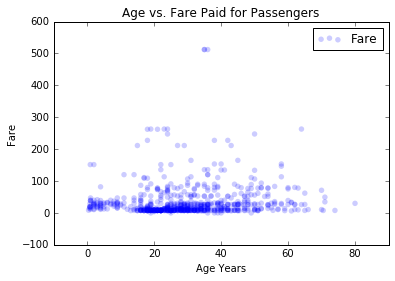

In [5]:
# Creating a Scatter Plot to examine age vs. fare to get on ship

age = titanic_df.Age
fare = titanic_df.Fare

# Plot using thinkplot's scatter
thinkplot.Scatter(age, fare)
thinkplot.Show(title='Age vs. Fare Paid for Passengers',
              xlabel='Age Years',
              ylabel='Fare')

There seems to be no obvious trend with the age vs fare price. Initially, I predicted that people of older age would have a higher price as they took up more resources than children. I may have to use different scales (like a log scale) to maybe see the data in more depth, and divide up groups for further analysis. However, the richest people who pay the most fare may be the middle aged successful people.